# Neural Network Machine Learning Model

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import MeanSquaredError, MeanAbsoluteError, MeanAbsolutePercentageError
from tensorflow.keras.losses import MeanSquaredError

!pip install tensorflow-addons
from tensorflow_addons.metrics import RSquare

import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# Load your dataset into a pandas DataFrame (assuming you have a 'data' DataFrame)

# ------------------------------- ATTEMPT 1 -------------------------------
df_file_path = '/content/drive/My Drive/Colab Notebooks/Data/Machine Learning Dataset.csv'
# df_file_path = '/content/drive/My Drive/Colab Notebooks/Data/Machine Learning Dataset (Date).csv'
# -------------------------------------------------------------------------

# ------------------------------- ATTEMPT 2 -------------------------------
# df_file_path = '/content/drive/My Drive/Colab Notebooks/Data/Machine Learning Dataset Extended.csv'
# df_file_path = '/content/drive/My Drive/Colab Notebooks/Data/Machine Learning Dataset Extended (Date).csv'
# -------------------------------------------------------------------------

df = pd.read_csv(df_file_path)

# df.head()
# print(df.info())        # SANITY CHECK: check the number of columns, rows, variables and their datat types

,Daily LE,Date,B1,B2,B3,B4,B5,B6,B7,B8,B9,B10,B11,BQA,Cloud Cover,NDVI,EVI,SAVI,VARI,NDWI
0,5156.32,20131207,0.497804,0.485867,0.454756,0.452261,0.566240,0.189162,0.186980,0.454444,0.135647,238.920853,239.945053,6896.0,72.90,0.111908,0.448165,0.112590,0.005922,-0.109192
1,5156.32,20131207,0.496765,0.484919,0.453825,0.451403,0.565087,0.188718,0.186651,0.453603,0.135376,238.902222,239.925430,6896.0,78.74,0.111840,0.446443,0.112448,0.005764,-0.109196
2,6282.30,20131223,0.453684,0.451080,0.428183,0.432599,0.586718,0.445939,0.331340,0.428975,0.001812,289.415314,287.303070,2800.0,50.47,0.151199,0.482097,0.152160,-0.010779,-0.156208
3,6282.30,20131223,0.464541,0.462078,0.439688,0.444478,0.598045,0.454939,0.336979,0.438084,0.001830,289.397308,287.303070,2800.0,81.24,0.147303,0.480300,0.149333,-0.011348,-0.152598
4,6850.13,20140209,0.152457,0.129961,0.115597,0.087031,0.332401,0.151004,0.071284,0.104161,0.029057,281.603027,278.779419,6816.0,35.13,0.585005,0.697169,0.400307,0.393099,-0.483942


In [ ]:
# Date Variable Testing

## ---------------------------------------------------------------------- Epoch ----------------------------------------------------------------------
# df_epoch_file_path = '/content/drive/My Drive/Colab Notebooks/Data/Machine Learning Dataset (Date) - epoch.csv'
# df_epoch = pd.read_csv(df_epoch_file_path)
# df_epoch.head()

# df = df_epoch
## ----------------------------------------------------------------------------------------------------------------------------------------------------

## ------------------------------------------------------------- Epoch, Year, Month & Day -------------------------------------------------------------
# df_epoch_and_year_month_day_file_path = '/content/drive/My Drive/Colab Notebooks/Data/Machine Learning Dataset (Date) - epoch, year, month, day.csv'
# df_epoch_and_year_month_day = pd.read_csv(df_epoch_and_year_month_day_file_path)
# df_epoch_and_year_month_day.head()

# df = df_epoch_and_year_month_day

## ----------------------------------------------------------------------------------------------------------------------------------------------------

# NOTE: if you want to normalise these datasets, use the 'Without Date' option below as the date variable has been removed from these datasets

In [ ]:
# Normalize columns (except LE)
scaler = MinMaxScaler()

# ----------- Without Date -----------
df.iloc[:, 1:] = scaler.fit_transform(df.iloc[:, 1:])
# ------------------------------------

# ------------- With Date ------------
# df.iloc[:, 2:] = scaler.fit_transform(df.iloc[:, 2:])
# ------------------------------------

df.head()

,Daily LE,Date,B1,B2,B3,B4,B5,B6,B7,B8,B9,B10,B11,BQA,Cloud Cover,NDVI,EVI,SAVI,VARI,NDWI
0,5156.32,20131207,0.497804,0.485867,0.454756,0.452261,0.566240,0.189162,0.186980,0.454444,0.135647,238.920853,239.945053,6896.0,72.90,0.111908,0.448165,0.112590,0.005922,-0.109192
1,5156.32,20131207,0.496765,0.484919,0.453825,0.451403,0.565087,0.188718,0.186651,0.453603,0.135376,238.902222,239.925430,6896.0,78.74,0.111840,0.446443,0.112448,0.005764,-0.109196
2,6282.30,20131223,0.453684,0.451080,0.428183,0.432599,0.586718,0.445939,0.331340,0.428975,0.001812,289.415314,287.303070,2800.0,50.47,0.151199,0.482097,0.152160,-0.010779,-0.156208
3,6282.30,20131223,0.464541,0.462078,0.439688,0.444478,0.598045,0.454939,0.336979,0.438084,0.001830,289.397308,287.303070,2800.0,81.24,0.147303,0.480300,0.149333,-0.011348,-0.152598
4,6850.13,20140209,0.152457,0.129961,0.115597,0.087031,0.332401,0.151004,0.071284,0.104161,0.029057,281.603027,278.779419,6816.0,35.13,0.585005,0.697169,0.400307,0.393099,-0.483942


In [ ]:
# Split the dataset into train, validation, and test sets
  # usually 80/10/10 or 60/20/20
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)            # 80% train data and 20% test data
train_data, val_data = train_test_split(train_data, test_size=0.1, random_state=42)     # 10% validation data and 10% validation data

In [ ]:
# Calculate the mean of the 'Daily LE' column
mean_daily_le = train_data['Daily LE'].mean()

In [ ]:
# Define the fully connected dense model
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=df.shape[1] - 1))  # Subtract 1 for the LE column
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='linear'))  # Output layer for regression

In [ ]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss=MeanSquaredError(), metrics=[MeanAbsoluteError(), RSquare()])

In [ ]:
# Prepare the data for training
X_train = train_data.iloc[:, 1:]  # Features
y_train = train_data['Daily LE']  # Target

X_val = val_data.iloc[:, 1:]
y_val = val_data['Daily LE']

X_test = test_data.iloc[:, 1:]
y_test = test_data['Daily LE']

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/50
169/169 [==============================] - 2s 5ms/step - loss: 85974728704.0000 - mean_absolute_error: 117759.4062 - r_square: -20713.5664 - val_loss: 4110396.5000 - val_mean_absolute_error: 1639.2581 - val_r_square: -0.0045
Epoch 2/50
169/169 [==============================] - 1s 5ms/step - loss: 4326482.0000 - mean_absolute_error: 1642.8704 - r_square: -0.0424 - val_loss: 4187740.0000 - val_mean_absolute_error: 1511.1051 - val_r_square: -0.0234
Epoch 3/50
169/169 [==============================] - 1s 4ms/step - loss: 4281828.5000 - mean_absolute_error: 1638.1394 - r_square: -0.0317 - val_loss: 4727490.5000 - val_mean_absolute_error: 1536.8778 - val_r_square: -0.1553
Epoch 4/50
169/169 [==============================] - 1s 4ms/step - loss: 4338406.5000 - mean_absolute_error: 1640.8232 - r_square: -0.0453 - val_loss: 4474845.0000 - val_mean_absolute_error: 1517.5193 - val_r_square: -0.0935
Epoch 5/50
169/169 [==============================] - 1s 4ms/step - loss: 4361583.5000

In [ ]:
# Evaluate the model on the test set
test_loss, test_mae, test_r_squared = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test MAE: {test_mae}, Test R-squared: {test_r_squared}")

47/47 [==============================] - 0s 4ms/step - loss: 8703359.0000 - mean_absolute_error: 2214.1392 - r_square: -1.1646
Test Loss: 8703359.0, Test MAE: 2214.13916015625, Test R-squared: -1.164566993713379


In [ ]:
# Calculate normalized performance metrics
normalized_test_loss = test_loss / mean_daily_le
normalized_test_mae = test_mae / mean_daily_le

print(f"Normalized Test Loss: {normalized_test_loss * 100}%")
print(f"Normalized Test MAE: {normalized_test_mae * 100}%")

Normalized Test Loss: 385228.0819507342%
Normalized Test MAE: 98.00222900595065%


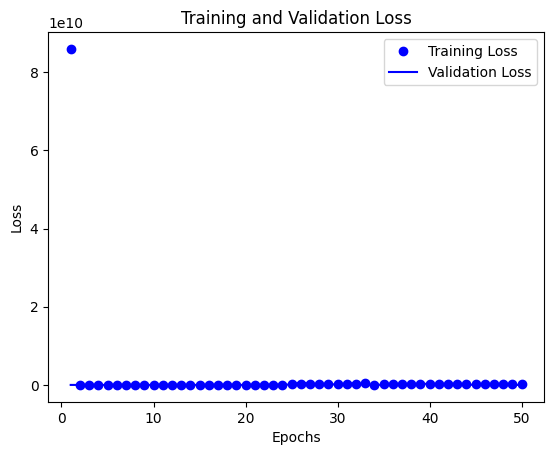

In [ ]:
# Access the training history
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
epochs = range(1, len(training_loss) + 1)

# Plot training and validation loss
plt.plot(epochs, training_loss, 'bo', label='Training Loss')
plt.plot(epochs, validation_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


47/47 [==============================] - 0s 2ms/step


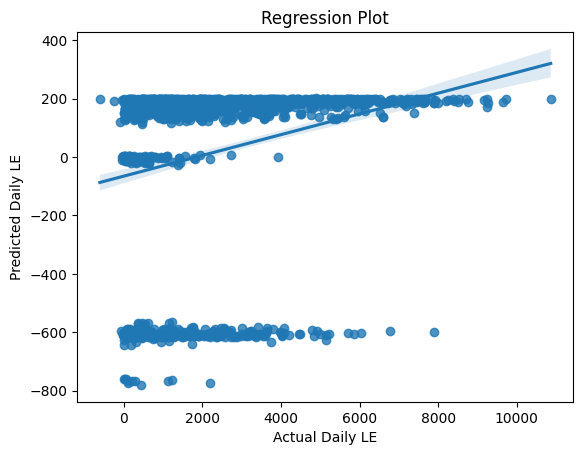

In [ ]:
# Predict on the test set
y_pred = model.predict(X_test)

# Create a regression plot
sns.regplot(x=y_test, y=y_pred)
plt.xlabel('Actual Daily LE')
plt.ylabel('Predicted Daily LE')
plt.title('Regression Plot')
plt.show()
